In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# set the filepath and load in a shapefile
fp = "IDN_adm/IDN_adm1.shp"
map_df = gpd.read_file(fp)
# check the GeoDataframe
map_df.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,106,IDN,Indonesia,1,Aceh,Propinsi,Autonomous Province,None,Achin|Atjeh|Nanggroe Aceh Darussalam,(POLYGON ((97.38493347167986 1.977126002311707...
1,106,IDN,Indonesia,2,Bali,Propinsi,Province,None,Penida|Lembongan|Ceningan|Menjangan,"(POLYGON ((115.6298828125 -8.77598762512207, 1..."
2,106,IDN,Indonesia,3,Bangka-Belitung,Propinsi,Province,None,Babel|Kepulauan Bangka Belitung,"(POLYGON ((108.0695114135744 -3.8030490875243,..."
3,106,IDN,Indonesia,4,Banten,Propinsi,Province,None,None,(POLYGON ((105.5486068725586 -6.99471807479858...
4,106,IDN,Indonesia,5,Bengkulu,Propinsi,Province,None,Bencoolen|Benkoelen|Benkulen,(POLYGON ((102.3862686157229 -5.47111892700195...


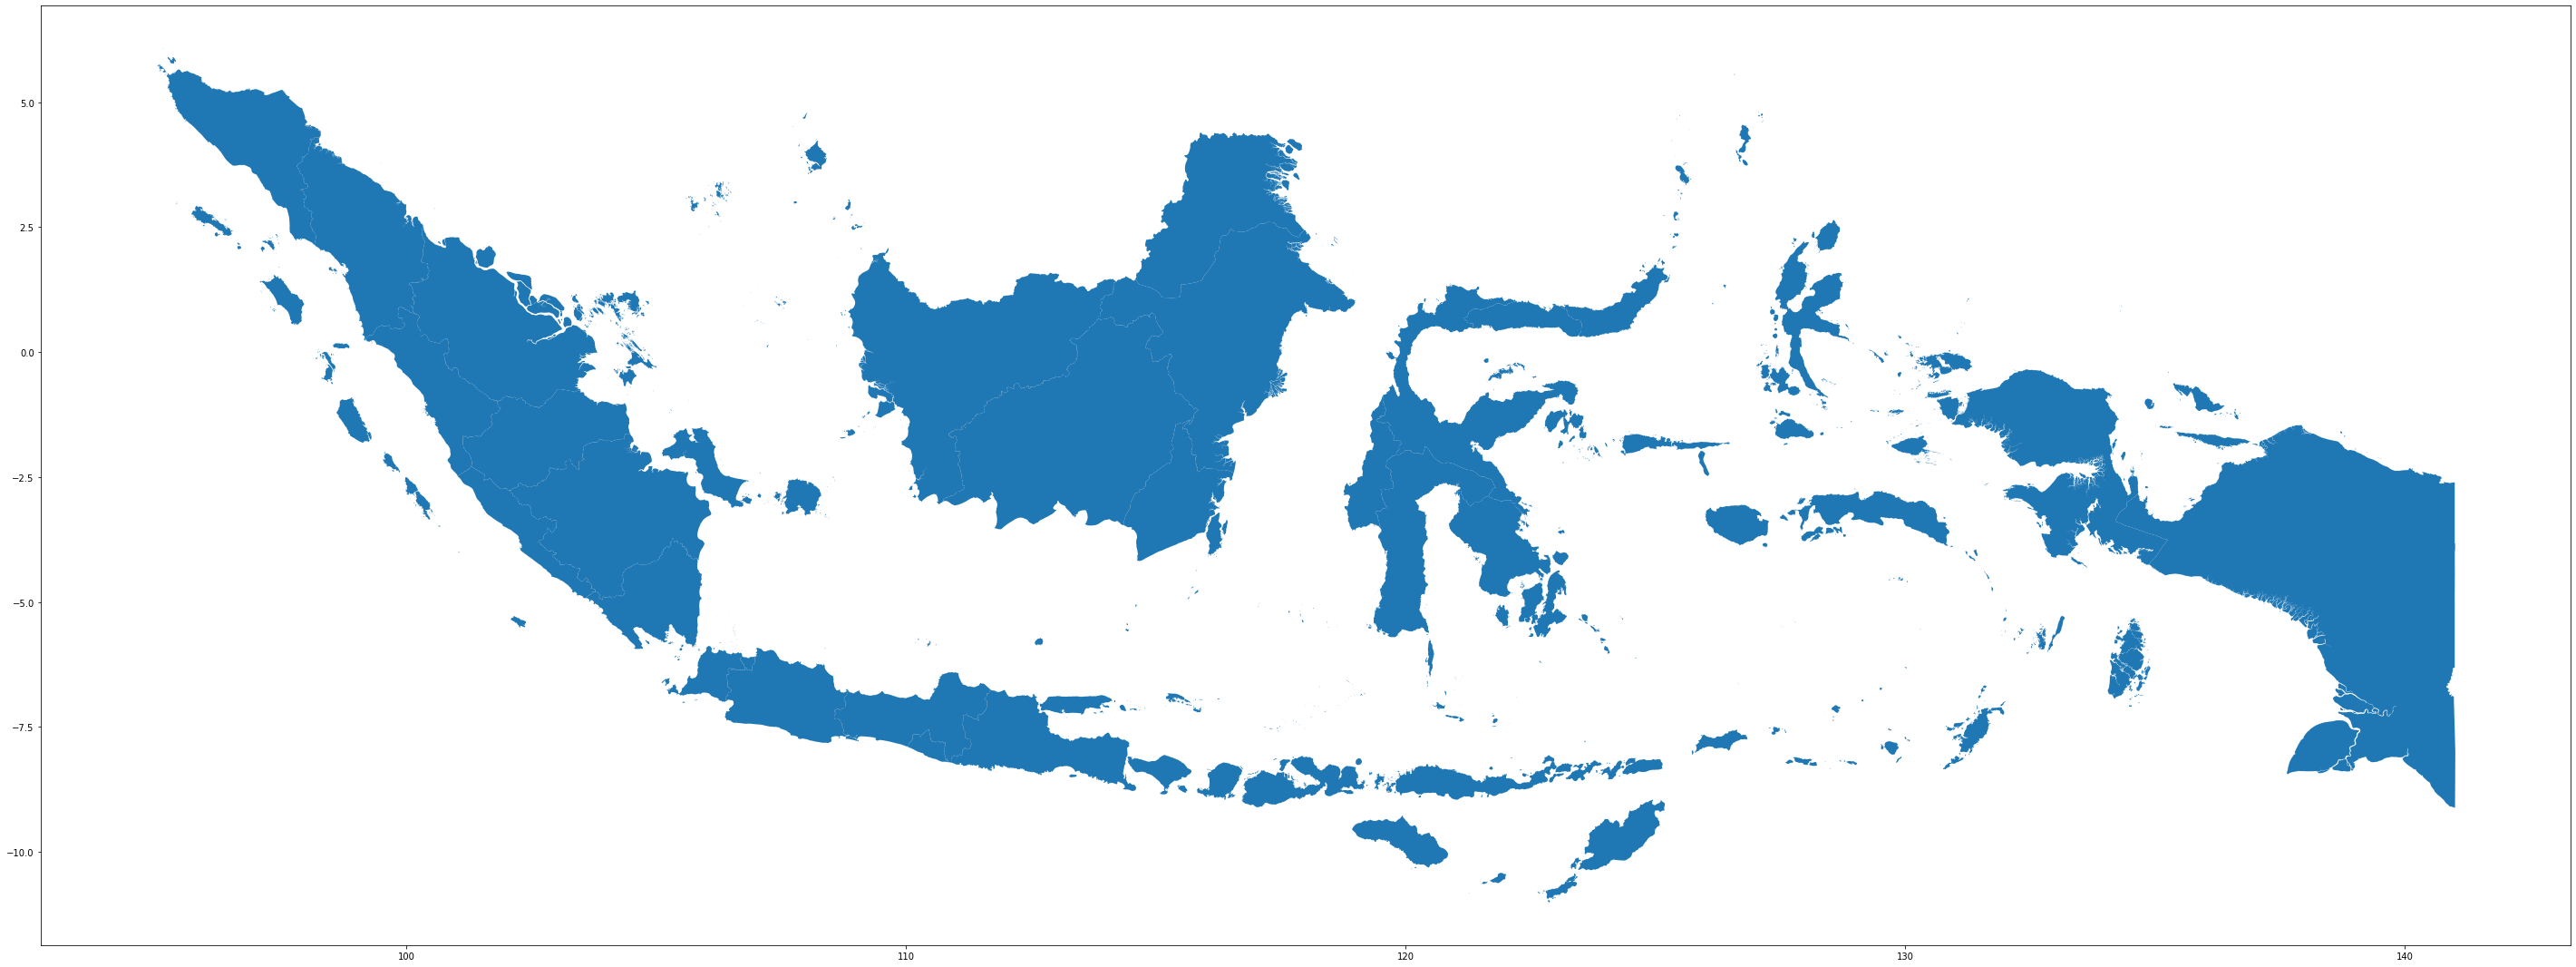

In [4]:
plt.rcParams['figure.figsize'] = [50, 70] #height, width
map_df.plot()

In [5]:
province = pd.read_csv("data_province.csv", sep=";")
province.head()

,province,population_2015,area_km2,population_density_per_km2,cities_regencies,cities,regencies
0,Jawa Timur,38828061,48,828,38,9,29
1,Jawa Tengah,33753023,41,894,35,6,29
2,Sumatera Utara,13923262,73,188,33,8,25
3,Papua,3143088,319,8,29,1,28
4,Jawa Barat,46668214,35,1,27,9,18


In [6]:
# join the geodataframe with the csv dataframe
merged = map_df.merge(province, how='left', left_on="NAME_1", right_on="province")
merged = merged[['province', 'geometry', 'population_2015', 'area_km2', 'population_density_per_km2', \
                'cities_regencies', 'cities', 'regencies']]

merged.head()

,province,geometry,population_2015,area_km2,population_density_per_km2,cities_regencies,cities,regencies
0,Aceh,(POLYGON ((97.38493347167986 1.977126002311707...,4993385.0,58.0,77.0,23.0,5,18.0
1,Bali,"(POLYGON ((115.6298828125 -8.77598762512207, 1...",4148588.0,6.0,621.0,9.0,1,8.0
2,Bangka-Belitung,"(POLYGON ((108.0695114135744 -3.8030490875243,...",1370331.0,16.0,64.0,7.0,1,6.0
3,Banten,(POLYGON ((105.5486068725586 -6.99471807479858...,11934373.0,10.0,909.0,8.0,4,4.0
4,Bengkulu,(POLYGON ((102.3862686157229 -5.47111892700195...,1872136.0,20.0,84.0,10.0,1,9.0


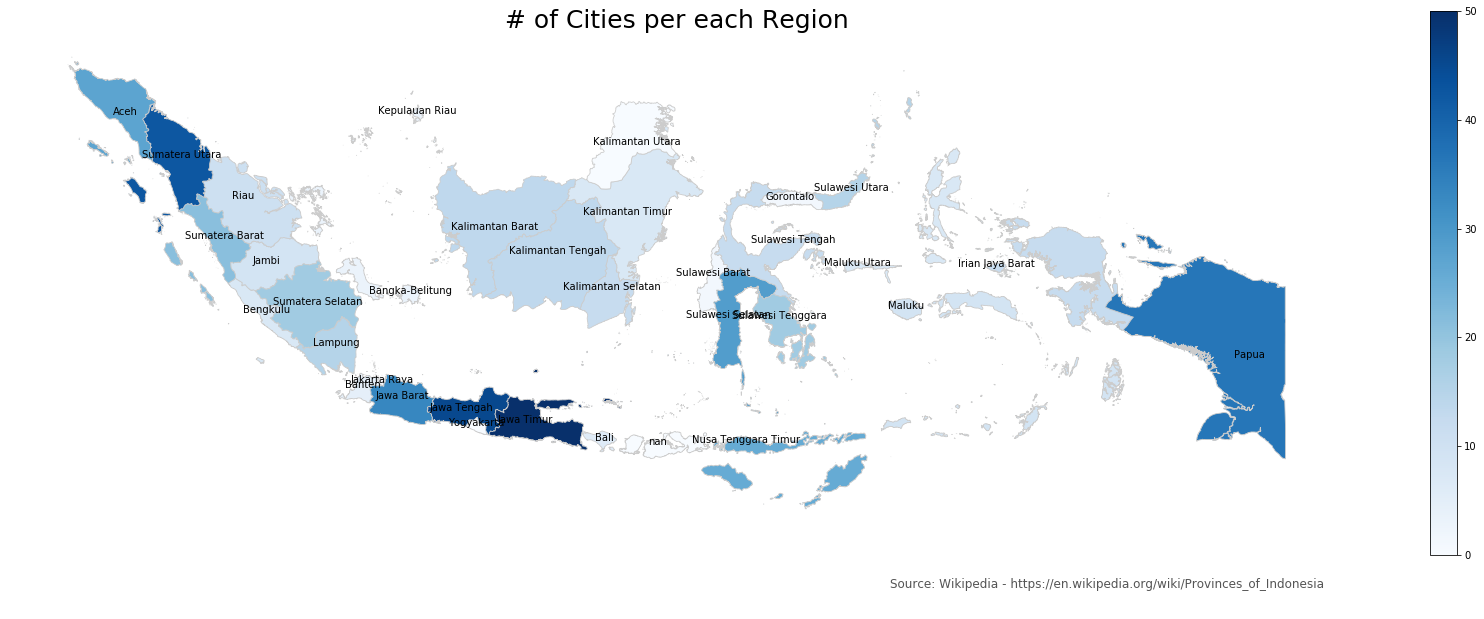

In [12]:
# set the value column that will be visualised
variable = 'cities_regencies'
# set the range for the choropleth values
vmin, vmax = 0, 50
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))
# remove the axis
ax.axis('off')

# add a title and annotation
ax.set_title('# of Cities per each Region', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source: Wikipedia - https://en.wikipedia.org/wiki/Provinces_of_Indonesia',xy=(0.6, .05),  \
            xycoords='figure fraction', fontsize=12, \
            color='#555555')

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it
# add the colorbar to the figure
fig.colorbar(sm)

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add Labels
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]

for idx, row in merged.iterrows():
    plt.annotate(s=row['province'], xy=row['coords'],horizontalalignment='center')
 

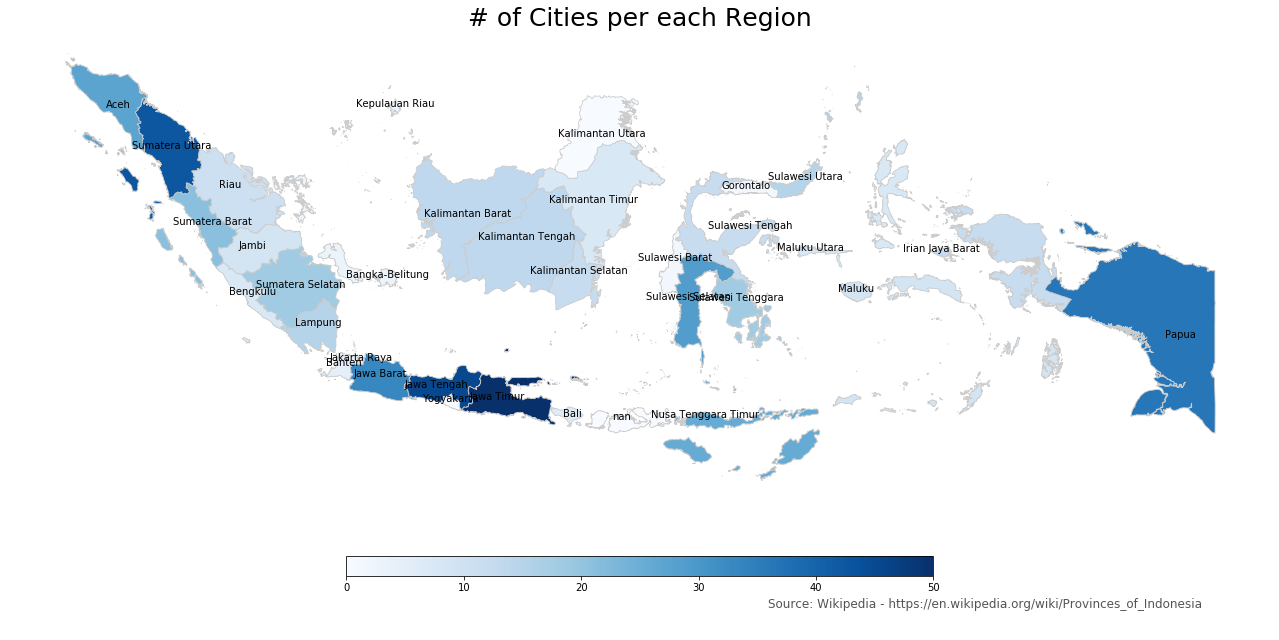

In [13]:
# set the value column that will be visualised
variable = 'cities_regencies'
# set the range for the choropleth values
vmin, vmax = 0, 50
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))
# remove the axis
ax.axis('off')

# add a title and annotation
ax.set_title('# of Cities per each Region', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source: Wikipedia - https://en.wikipedia.org/wiki/Provinces_of_Indonesia',xy=(0.6, .05),  \
            xycoords='figure fraction', fontsize=12, \
            color='#555555')

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it
# add the colorbar to the figure
fig.colorbar(sm, orientation="horizontal", fraction=0.036, pad=0.1, aspect = 30)

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add Labels
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]

for idx, row in merged.iterrows():
    plt.annotate(s=row['province'], xy=row['coords'],horizontalalignment='center')
 


In [14]:
fig.savefig('map.png', dpi=300)